# Titanic: Machine Learning from Disaster - EDA

<a id="table-of-contents"></a>
1. [Introduction](#introduction)
    * 1.1. [Personal](#personal)
    * 1.2. [Competition](#competition)
    * 1.3. [Goal](#goal)
    * 1.4. [Metric](#metric)
    * 1.5. [Data Dictionary](#data-dictionary)
    * 1.6. [Features Notes](#variable-notes)
2. [Preparation](#preparation)
    * 2.1. [Packages](#packages)
    * 2.2. [Datasets](#datasets)
3. [A quick glance on train and test dataset](#quick-glance)
    * 3.1. [Train dataset](#train-dataset)
    * 3.2. [Test dataset](#test-dataset)
4. [Features comparison between train and test dataset](#features-comparison)
5. [Features analysis on train dataset](#features-analysis)
    * 5.1 [PClass (Ticket class)](#pclass2)
    * 5.2 [Sex](#sex2)
    * 5.3 [Age](#age2)
    * 5.4 [Family Member (SibSp - Sibblings Spouse + Parch - Parents Childrens)](#family)
    * 5.5 [Fare](#fare2)
    * 5.6 [Cabin](#cabin2)
    * 5.7 [Embarked](#embarked2)
6. [Summary](#summary)

<a id="introduction"></a>
## 1. Introduction

<a id="personal"></a>
[back to top](#table-of-contents)
### 1.1 Personal
This is my first EDA kernel. I belive it's far from good. I would like to know what you think and I hope I can get suggestions or recommendations to improve my skills or kernels.

<a id="competition"></a>
[back to top](#table-of-contents)
### 1.2 Competition
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

<a id="goal"></a>
[back to top](#table-of-contents)
### 1.3 Goal
Predict if a passenger survived the sinking of the Titanic or not.

<a id="metric"></a>
[back to top](#table-of-contents)
### 1.4 Metric
The score is the percentage of passengers that are correctly predicted, known as accuracy.

<a id="data-dictionary"></a>
[back to top](#table-of-contents)
### 1.5 Data Dictionary
**survival:** Survival ~ 0 = No, 1 = Yes

**pclass:** Ticket class ~ 1 = 1st, 2 = 2nd, 3 = 3rd

**sex:** Sex	

**Age:** Age in years	

**sibsp:**	# of siblings / spouses aboard the Titanic	

**parch:**	# of parents / children aboard the Titanic	

**ticket:**	Ticket number	

**fare:**	Passenger fare	

**cabin:**	Cabin number	

**embarked:**	Port of Embarkation	~ C = Cherbourg, Q = Queenstown, S = Southampton

<a id="variable-notes"></a>
[back to top](#table-of-contents)
### 1.6 Features Notes
**pclass:** A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

**age:** Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp:** The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

**parch:** The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

<a id="preparation"></a>
## 2. Preparation
<a id="packages"></a>
[back to top](#table-of-contents)
### 2.1 Packages
Pandas and Numpy for data wrangling and Seaborn for data visualization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

<a id="datasets"></a>
[back to top](#table-of-contents)
### 2.2 Datasets
Train and test data will be used for this analysis

In [2]:
train_df = pd.read_csv("../input/titanic/train.csv")
test_df = pd.read_csv("../input/titanic/test.csv")

<a id="quick-glance"></a>
## 3. A quick glance on train and test dataset
<a id="train-dataset"></a>
[back to top](#table-of-contents)
### 3.1 Train dataset
**Observations:**
* There are 891 rows with 12 columns
* Age: The average age of the Titanic passengers is 29.7 years old with the oldest at 80 years and the youngest at 5 months.
* SibSp: the maximum siblings/spouses on the passengers is 8.
* Parch: the maximum parents/children on the passengers is 6.
* Fare: The average fare is 32.2 with the lowest is 0 and the highest is 512. It's quite interesting that there are tickets that has zero value. Is this a crew members of the Titanic?
* Missing values have been spotted on Age (177), Cabin (687) and Embarked (2)

#### 3.1.1 Rows & Columns

In [3]:
train_df.shape

(891, 12)

#### 3.1.2 Preview the first 5 rows of train dataset

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 3.1.3 Summary statistics on Age, SibSp, Parch and Fare

In [5]:
columns_selected = ["Age", "SibSp", "Parch", "Fare"]
train_df[columns_selected].describe()

,Age,SibSp,Parch,Fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


#### 3.1.4 Missing values

In [6]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<a id="test-dataset"></a>
[back to top](#table-of-contents)
### 3.2 Test dataset

**Observations:**
* There are 418 rows and 11 columns, meaning there are 418 rows that need to be predicted. It has less 1 column **Survived** as it need to be predicted. 
* Age: The average age of the Titanic passengers is 30.3 years old, which is quite consistent with train dataset of 29.7 years old. The youngest in the dataset is 2 months compared to 5 months in the train dataset.
* SibSp: the maximum siblings/spouses on the passengers is 8 which is same with the train dataset.
* Parch: the maximum parents/children on the passengers is 9 which is higher than train dataset of 6.
* Fare: The average fare is 35.6 with the lowest is 0 and the highest is 512.3. It's quite consitent with the train dataset.
* There are 86 missing values on Age and 327 mission values on Cabin.

#### 3.2.1 Rows & Columns

In [7]:
test_df.shape

(418, 11)

**3.2.2 Preview the first 5 rows of test dataset**

In [8]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#### 3.2.3 Summary statistics on Age, SibSp, Parch and Fare

In [9]:
test_df[columns_selected].describe()

,Age,SibSp,Parch,Fare
count,332.000000,418.000000,418.000000,417.000000
mean,30.272590,0.447368,0.392344,35.627188
std,14.181209,0.896760,0.981429,55.907576
min,0.170000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000,7.895800
50%,27.000000,0.000000,0.000000,14.454200
75%,39.000000,1.000000,0.000000,31.500000
max,76.000000,8.000000,9.000000,512.329200


#### 3.2.4 Missing values

In [10]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<a id="features-comparison"></a>
## 4. Features comparison between train and test dataset
We have seen a glance overview of train and test dataset from the previous sections. Let's plot into graphs to see if there are any differences between the train and test dataset. Train dataset will have **gray** color and test dataset will have **teal** color. 

**Observations:**
* Most of the features distribution are quite the same betwen train and test dataset, although it's not perfectly same as can be seen in the below charts. 
* Special attention is needed for **Cabin** features. Train has 148 unique values while Test has 77 unique values. Things that we must do first is to take the first characters for the cabin name to get a more representative figures.

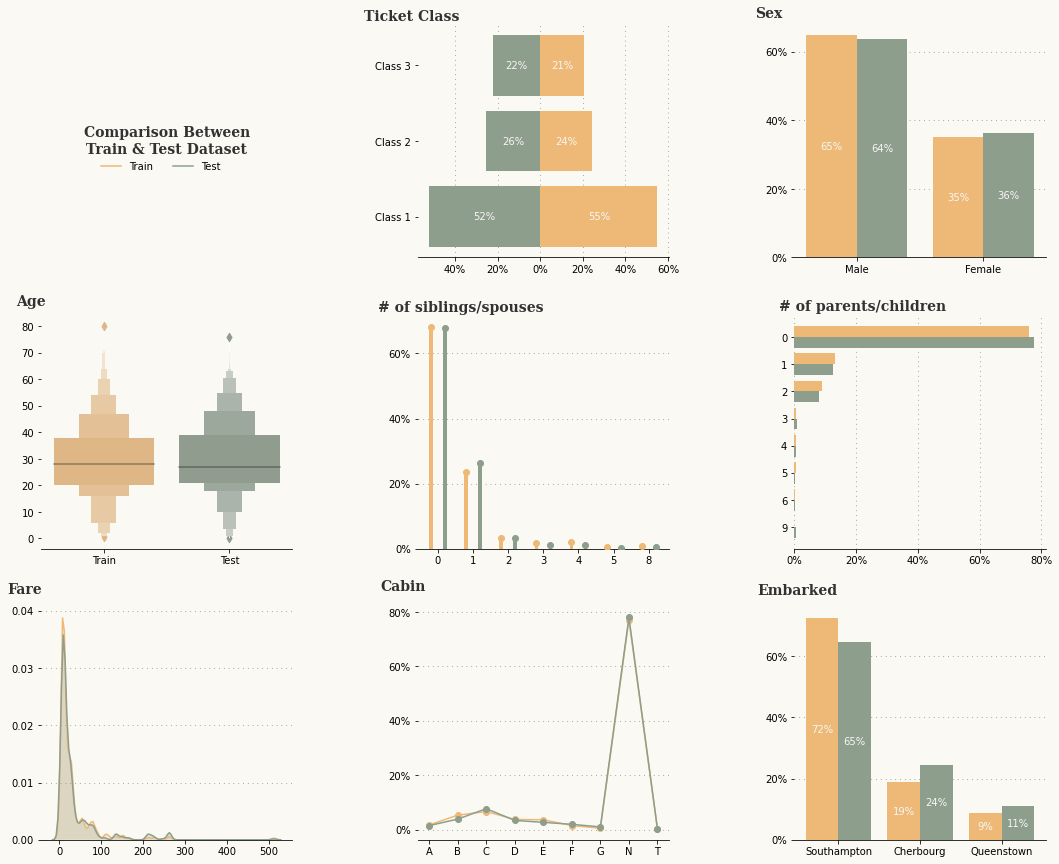

In [11]:
fig = plt.figure(figsize=(18,15))
gs = fig.add_gridspec(3, 3)
gs.update(wspace=0.5, hspace=0.25)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[1, 2])
ax6 = fig.add_subplot(gs[2, 0])
ax7 = fig.add_subplot(gs[2, 1])
ax8 = fig.add_subplot(gs[2, 2])

background_color = "#faf9f4"
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) # axes background color
ax1.set_facecolor(background_color) # axes background color
ax2.set_facecolor(background_color) # axes background color
ax3.set_facecolor(background_color) # axes background color
ax4.set_facecolor(background_color) # axes background color
ax5.set_facecolor(background_color) # axes background color
ax6.set_facecolor(background_color) # axes background color
ax7.set_facecolor(background_color) # axes background color
ax8.set_facecolor(background_color) # axes background color

# Ax0
ax0.spines["bottom"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5, 0.5, 'Comparison Between\nTrain & Test Dataset', horizontalalignment='center', verticalalignment='center',
         fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")


# Ax1 - Ticket Class / PClass
train_graph_temp_df = pd.DataFrame(train_df["Pclass"].value_counts())
train_graph_temp_df["Percentage"] = train_graph_temp_df["Pclass"].apply(lambda x: x/sum(train_graph_temp_df["Pclass"])*100)
test_graph_temp_df = pd.DataFrame(test_df["Pclass"].value_counts())
test_graph_temp_df["Percentage"] = test_graph_temp_df["Pclass"].apply(lambda x: x/sum(test_graph_temp_df["Pclass"])*100)

ax1.grid(color='gray', linestyle=':', axis='x', zorder=0,  dashes=(1,5))
ax1.barh(["Class 1", "Class 2", "Class 3"], train_graph_temp_df["Percentage"], zorder=3, color="#eeb977")
ax1.barh(["Class 1", "Class 2", "Class 3"], test_graph_temp_df["Percentage"]*-1, zorder=3, color="#8d9e8c")
ax1.text(-83, 2.6, 'Ticket Class', 
         fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax1.xaxis.set_major_formatter(mtick.PercentFormatter())
ax1.xaxis.set_major_locator(mtick.MultipleLocator(20))
ax1.set_xticklabels(["60%", "40%", "20%", "0%", "20%", "40%", "60%"])
for i,j in zip(["Class 1", "Class 2", "Class 3"], train_graph_temp_df["Percentage"]):
    ax1.annotate(f'{j:0.0f}%',xy=(j/2,i), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')
for i,j in zip(["Class 1", "Class 2", "Class 3"], test_graph_temp_df["Percentage"]):
    ax1.annotate(f'{j:0.0f}%',xy=((j*-1)/2,i), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')
    
# Ax2 - Sex
train_graph_temp_df = pd.DataFrame(train_df["Sex"].value_counts())
train_graph_temp_df["Percentage"] = train_graph_temp_df["Sex"].apply(lambda x: x/sum(train_graph_temp_df["Sex"])*100)
test_graph_temp_df = pd.DataFrame(test_df["Sex"].value_counts())
test_graph_temp_df["Percentage"] = test_graph_temp_df["Sex"].apply(lambda x: x/sum(test_graph_temp_df["Sex"])*100)

x = np.arange(len(train_graph_temp_df))
ax2.text(-0.6, 70, 'Sex', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax2.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax2.bar(x, height=train_graph_temp_df["Percentage"], zorder=3, color="#eeb977", width=0.4)
ax2.bar(x+0.4, height=test_graph_temp_df["Percentage"], zorder=3, color="#8d9e8c", width=0.4)
ax2.set_xticks(x + 0.4 / 2)
ax2.set_xticklabels(["Male", "Female"])
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.yaxis.set_major_locator(mtick.MultipleLocator(20))
for i,j in zip([0, 1], train_graph_temp_df["Percentage"]):
    ax2.annotate(f'{j:0.0f}%',xy=(i, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')
for i,j in zip([0, 1], test_graph_temp_df["Percentage"]):
    ax2.annotate(f'{j:0.0f}%',xy=(i+0.4, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')
    
# Ax3 - Age
train_graph_temp_df = pd.DataFrame(train_df["Age"])
train_graph_temp_df["TrainTest"] = "Train"
test_graph_temp_df = pd.DataFrame(test_df["Age"])
test_graph_temp_df["TrainTest"] = "Test"
ax3.text(-0.7, 88, 'Age', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
comb_graph_temp_df = pd.concat([train_graph_temp_df, test_graph_temp_df], axis=0)
sns.boxenplot(ax=ax3, y="Age", x="TrainTest", data=comb_graph_temp_df, palette=["#eeb977", "#8d9e8c"])
ax3.set_xlabel("")
ax3.set_ylabel("")

# Ax4 - #no of siblings
ax4.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
train_graph_temp_df = pd.DataFrame(train_df["SibSp"].value_counts())
train_graph_temp_df["Percentage"] = train_graph_temp_df["SibSp"].apply(lambda x: x/sum(train_graph_temp_df["SibSp"])*100)
train_graph_temp_df = train_graph_temp_df.sort_index()
test_graph_temp_df = pd.DataFrame(test_df["SibSp"].value_counts())
test_graph_temp_df["Percentage"] = test_graph_temp_df["SibSp"].apply(lambda x: x/sum(test_graph_temp_df["SibSp"])*100)
test_graph_temp_df = test_graph_temp_df.sort_index()
ax4.bar(np.arange(len(train_graph_temp_df.index)), height=train_graph_temp_df["Percentage"], zorder=3, color="#eeb977", width=0.1)
ax4.scatter(np.arange(len(train_graph_temp_df.index)), train_graph_temp_df["Percentage"], zorder=3, color="#eeb977")
ax4.bar(np.arange(len(test_graph_temp_df.index))+0.4, height=test_graph_temp_df["Percentage"], zorder=3, color="#8d9e8c", width=0.1)
ax4.scatter(np.arange(len(test_graph_temp_df.index))+0.4, test_graph_temp_df["Percentage"], zorder=3, color="#8d9e8c")
ax4.text(-1.5, 73, '# of siblings/spouses', 
         fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax4.yaxis.set_major_formatter(mtick.PercentFormatter())
ax4.yaxis.set_major_locator(mtick.MultipleLocator(20))
ax4.set_xticks(np.arange(len(train_graph_temp_df.index))+0.4 / 2)
ax4.set_xticklabels(list(train_graph_temp_df.index))

# Ax5 - # of parents/children
train_graph_temp_df = pd.DataFrame(train_df["Parch"].value_counts())
train_graph_temp_df["Percentage"] = train_graph_temp_df["Parch"].apply(lambda x: x/sum(train_graph_temp_df["Parch"])*100)
train_graph_temp_df = train_graph_temp_df.sort_index()
test_graph_temp_df = pd.DataFrame(test_df["Parch"].value_counts())
test_graph_temp_df["Percentage"] = test_graph_temp_df["Parch"].apply(lambda x: x/sum(test_graph_temp_df["Parch"])*100)
test_graph_temp_df = test_graph_temp_df.sort_index()
ax5.grid(color='gray', linestyle=':', axis='x', zorder=0,  dashes=(1,5))
ax5.barh(np.arange(len(train_graph_temp_df.index)), train_graph_temp_df["Percentage"], zorder=3, color="#eeb977", height=0.4)
ax5.barh(np.arange(len(test_graph_temp_df.index))+0.4, test_graph_temp_df["Percentage"], zorder=3, color="#8d9e8c", height=0.4)
ax5.text(-5, -0.8, '# of parents/children', 
         fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax5.xaxis.set_major_formatter(mtick.PercentFormatter())
ax5.yaxis.set_major_locator(mtick.MultipleLocator(1))
ax5.set_yticks(np.arange(len(test_graph_temp_df.index))+0.4 / 2)
ax5.set_yticklabels(list(test_graph_temp_df.index))
ax5.invert_yaxis()

# Ax6 - Fare
ax6.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
train_graph_temp_df = pd.DataFrame(train_df["Fare"])
test_graph_temp_df = pd.DataFrame(test_df["Fare"])
sns.kdeplot(train_graph_temp_df["Fare"], ax=ax6,color="#eeb977", shade=True, label="Train")
sns.kdeplot(test_graph_temp_df["Fare"], ax=ax6, color="#8d9e8c", shade=True, label="Test")
ax6.text(-125, 0.043, 'Fare', 
         fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax6.yaxis.set_major_locator(mtick.MultipleLocator(0.01))
ax6.legend(ncol=2, bbox_to_anchor=(0.75, 2.95), facecolor=background_color, edgecolor=background_color)

# Ax7 - #no of siblings
train_df["Cabin"] = train_df["Cabin"].fillna("No")
train_df["Cabin_code"] = train_df["Cabin"].str[0]
test_df["Cabin"] = train_df["Cabin"].fillna("No")
test_df["Cabin_code"] = train_df["Cabin"].str[0]

train_graph_temp_df = pd.DataFrame(train_df["Cabin_code"].value_counts())
train_graph_temp_df["Percentage"] = train_graph_temp_df["Cabin_code"].apply(lambda x: x/sum(train_graph_temp_df["Cabin_code"])*100)
train_graph_temp_df = train_graph_temp_df.sort_index()
test_graph_temp_df = pd.DataFrame(test_df["Cabin_code"].value_counts())
test_graph_temp_df["Percentage"] = test_graph_temp_df["Cabin_code"].apply(lambda x: x/sum(test_graph_temp_df["Cabin_code"])*100)
test_graph_temp_df = test_graph_temp_df.sort_index()
ax7.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax7.plot(np.arange(len(train_graph_temp_df.index)), train_graph_temp_df["Percentage"], zorder=3, color="#eeb977", marker='o')
ax7.plot(np.arange(len(test_graph_temp_df.index)), test_graph_temp_df["Percentage"], zorder=3, color="#8d9e8c", marker='o')
ax7.text(-1.7, 88, 'Cabin', 
         fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax7.yaxis.set_major_formatter(mtick.PercentFormatter())
ax7.yaxis.set_major_locator(mtick.MultipleLocator(20))
ax7.set_xticks(np.arange(len(train_graph_temp_df.index)))
ax7.set_xticklabels(list(train_graph_temp_df.index))

# Ax8 - Embarked
train_graph_temp_df = pd.DataFrame(train_df["Embarked"].value_counts())
train_graph_temp_df["Percentage"] = train_graph_temp_df["Embarked"].apply(lambda x: x/sum(train_graph_temp_df["Embarked"])*100)
test_graph_temp_df = pd.DataFrame(test_df["Embarked"].value_counts())
test_graph_temp_df["Percentage"] = test_graph_temp_df["Embarked"].apply(lambda x: x/sum(test_graph_temp_df["Embarked"])*100)

x = np.arange(len(train_graph_temp_df))
ax8.text(-0.8, 80, 'Embarked', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax8.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax8.bar(x, height=train_graph_temp_df["Percentage"], zorder=3, color="#eeb977", width=0.4)
ax8.bar(x+0.4, height=test_graph_temp_df["Percentage"], zorder=3, color="#8d9e8c", width=0.4)
ax8.set_xticks(x + 0.4 / 2)
ax8.set_xticklabels(["Southampton","Cherbourg","Queenstown"])
ax8.yaxis.set_major_formatter(mtick.PercentFormatter())
ax8.yaxis.set_major_locator(mtick.MultipleLocator(20))
for i,j in zip([0, 1, 2], train_graph_temp_df["Percentage"]):
    ax8.annotate(f'{j:0.0f}%',xy=(i, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')
for i,j in zip([0, 1, 2], test_graph_temp_df["Percentage"]):
    ax8.annotate(f'{j:0.0f}%',xy=(i+0.4, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')

for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)
    ax6.spines[s].set_visible(False)
    ax7.spines[s].set_visible(False)
    ax8.spines[s].set_visible(False)

<a id="features-analysis"></a>
## 5. Features analysis on train dataset
<a id="pclass2"></a>
[back to top](#table-of-contents)
### 5.1 PClass (Ticket class)
**Observations:**
* Around 55% of the passengers buy the 3rd class ticket, 24% buy the 1st class ticket and 21% buy the 2nd class ticket. 
* In the assumption of pyramid structure of the sold ticket (1st class was the lowest ticket to be sold and vice versa for the 3rd class ticket). There is quite an interesting finding that the 2nd class ticket is sold as lower than 1st class ticket. 
* Most of the survived passengers is the 1st class passengers, it contributed of 15% of total passengers and 63% of its own class.
* As expected the lowest passengers that survived is the 3rd class passengers, which contributed of 10% of total passengers and 24% of its own class.
* No of survived passengers in 1st class passengers are the highest compared to others class passengers, as may they have more  privilaged to access life boat first than others and ease access to the life boat positions from their cabin.

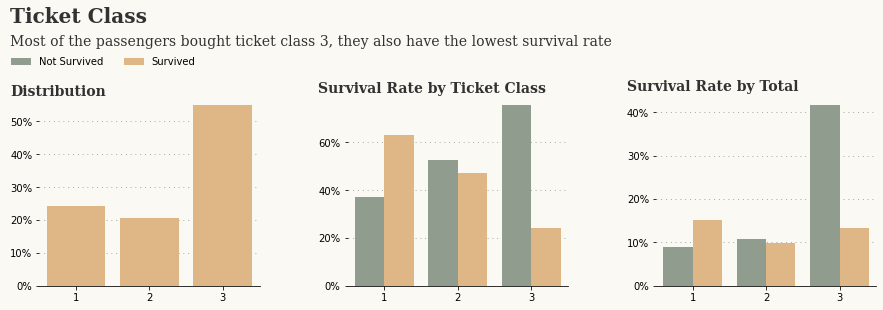

In [12]:
fig = plt.figure(figsize=(15,3.5))
gs = fig.add_gridspec(1, 3)
gs.update(wspace=0.4, hspace=0)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])

background_color = "#faf9f4"
color_palette = ["#8d9e8c", "#eeb977"]
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) # axes background color
ax1.set_facecolor(background_color) # axes background color
ax2.set_facecolor(background_color) # axes background color

# Distribution
ax0.text(-0.9, 80, 'Ticket Class', fontsize=20, fontweight='bold', fontfamily='serif', color="#323232")
ax0.text(-0.9, 73, 'Most of the passengers bought ticket class 3, they also have the lowest survival rate', 
         fontsize=14, fontweight='light', fontfamily='serif', color="#323232")
ax0.text(-0.9, 58, 'Distribution', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.barplot(ax=ax0, x="Pclass", y="Pclass", data=train_df, estimator=lambda x: len(x) / len(train_df)*100, 
            color="#eeb977", zorder=3)
ax0.yaxis.set_major_formatter(mtick.PercentFormatter())
ax0.yaxis.set_major_locator(mtick.MultipleLocator(10))
ax0.set_xlabel("")
ax0.set_ylabel("")

# Survived by Ticket Class
Pclass_count = train_df["Pclass"].value_counts().sort_index()
Pclass_df = pd.DataFrame(train_df.groupby(["Pclass", "Survived"])["Pclass"].count())
Pclass_df.columns = ["Count"]
Pclass_df = Pclass_df.reset_index(drop=False)
Pclass_df["Total_by_Pclass"] = Pclass_df["Pclass"].map(Pclass_count)
Pclass_df["Distribution_by_Pclass"] = Pclass_df["Count"] / Pclass_df["Total_by_Pclass"] * 100
ax1.text(-0.9, 81, 'Survival Rate by Ticket Class', fontsize=14, fontweight='bold', fontfamily='serif', 
         color="#323232")
ax1.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.barplot(ax=ax1, x="Pclass", y="Distribution_by_Pclass", data = Pclass_df, hue="Survived", zorder=3, palette=color_palette)
legend_labels, _= ax1.get_legend_handles_labels()
ax1.legend(legend_labels, ["Not Survived", "Survived"], ncol=2, bbox_to_anchor=(-0.65, 1.25), facecolor=background_color, edgecolor=background_color)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
ax1.yaxis.set_major_locator(mtick.MultipleLocator(20))
ax1.set_xlabel("")
ax1.set_ylabel("")

# Survived by Total
ax2.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax2.text(-0.9, 45, 'Survival Rate by Total', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
sns.barplot(ax=ax2, x="Pclass", y="Pclass", hue="Survived", data=train_df, 
            estimator=lambda x: (len(x) / len(train_df["Pclass"]) * 100), zorder=3, palette=color_palette)
ax2.get_legend().remove()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
ax2.yaxis.set_major_locator(mtick.MultipleLocator(10))
ax2.set_xlabel("")
ax2.set_ylabel("")


for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)

<a id="sex2"></a>
[back to top](#table-of-contents)
### 5.2 Sex
**Observations:**
* Titanic passengers dominated by man around 65% and Female passengers at 35%.
* In term **no of survived passengers**, it's expected there will be more non-survived for male passengers as Titanic is dominated by male passengers. In fact, it's inline with the assumption: 81 female passenters are not survived while 468 male pasenger are not survived.
* What is interesting in the accident that 74% of female survived from Titanic while only 19% of male survived, it seems they put priority to female for the life boat. This lead to no of survived in male and female passengers that are not too far with male at 109 and female at 81.

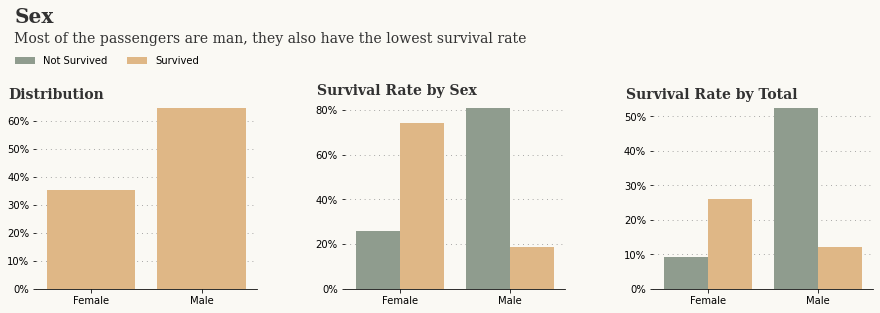

In [13]:
sex_label_encode = {"male": 1, "female": 0}
train_df["Sex"] = train_df["Sex"].map(sex_label_encode)
test_df["Sex"] = test_df["Sex"].map(sex_label_encode)

fig = plt.figure(figsize=(15,3.5))
gs = fig.add_gridspec(1, 3)
gs.update(wspace=0.4, hspace=0)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])

background_color = "#faf9f4"
color_palette = ["#8d9e8c", "#eeb977"]
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) # axes background color
ax1.set_facecolor(background_color) # axes background color
ax2.set_facecolor(background_color) # axes background color

# Distribution
ax0.text(-0.7, 95, 'Sex', fontsize=20, fontweight='bold', fontfamily='serif', color="#323232")
ax0.text(-0.7, 88, 'Most of the passengers are man, they also have the lowest survival rate', 
         fontsize=14, fontweight='light', fontfamily='serif', color="#323232")
ax0.text(-0.75, 68, 'Distribution', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.barplot(ax=ax0, x="Sex", y="Sex", data=train_df, estimator=lambda x: len(x) / len(train_df["Sex"])*100, 
            color="#eeb977", zorder=3)
ax0.yaxis.set_major_formatter(mtick.PercentFormatter())
ax0.yaxis.set_major_locator(mtick.MultipleLocator(10))
ax0.set_xlabel("")
ax0.set_ylabel("")
ax0.set_xticklabels(["Female","Male"])

# Survived by Sex
Sex_count = train_df["Sex"].value_counts().sort_index()
Sex_df = pd.DataFrame(train_df.groupby(["Sex", "Survived"])["Sex"].count())
Sex_df.columns = ["Count"]
Sex_df = Sex_df.reset_index(drop=False)
Sex_df["Total_by_Sex"] = Sex_df["Sex"].map(Sex_count)
Sex_df["Distribution_by_Sex"] = Sex_df["Count"] / Sex_df["Total_by_Sex"] * 100
ax1.text(-0.75, 87, 'Survival Rate by Sex', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax1.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.barplot(ax=ax1, x="Sex", y="Distribution_by_Sex", data = Sex_df, hue="Survived", palette=color_palette, zorder=3)
legend_labels, _= ax1.get_legend_handles_labels()
ax1.legend(legend_labels, ["Not Survived", "Survived"], ncol=2, bbox_to_anchor=(-0.62, 1.27), facecolor=background_color, edgecolor=background_color)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
ax1.yaxis.set_major_locator(mtick.MultipleLocator(20))
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_xticklabels(["Female","Male"])

# Survived by Total
ax2.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax2.text(-0.75, 55, 'Survival Rate by Total', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
sns.barplot(ax=ax2, x="Sex", y="Sex", hue="Survived", data=train_df, 
            estimator=lambda x: len(x) / len(train_df["Sex"]) * 100, palette=color_palette, zorder=3)
ax2.get_legend().remove()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
ax2.yaxis.set_major_locator(mtick.MultipleLocator(10))
ax2.set_xlabel("")
ax2.set_ylabel("")
ax2.set_xticklabels(["Female","Male"])

for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)

<a id="age2"></a>
[back to top](#table-of-contents)
### 5.3 Age
**Observations:**
* Most of the passengers are at age 15-40 years old
* To get more insight on the Age, we break the age into 2 categories: Baby and Non Baby. Baby will have a maximum age of 5 while Non Baby is going to be more than 5 years old. Further more we divide to male and female Baby and Non Baby.
* Baby has a higher chance to survive at 70% while non-baby have a lower chance of survival of 36%
* Non Baby female has 75% chance of survived compared to 18% of Non Baby male. 
* Most of non survived passengers come from Non Baby male which is 82% while most of the survived passengers come from Non Baby female which is 70%.

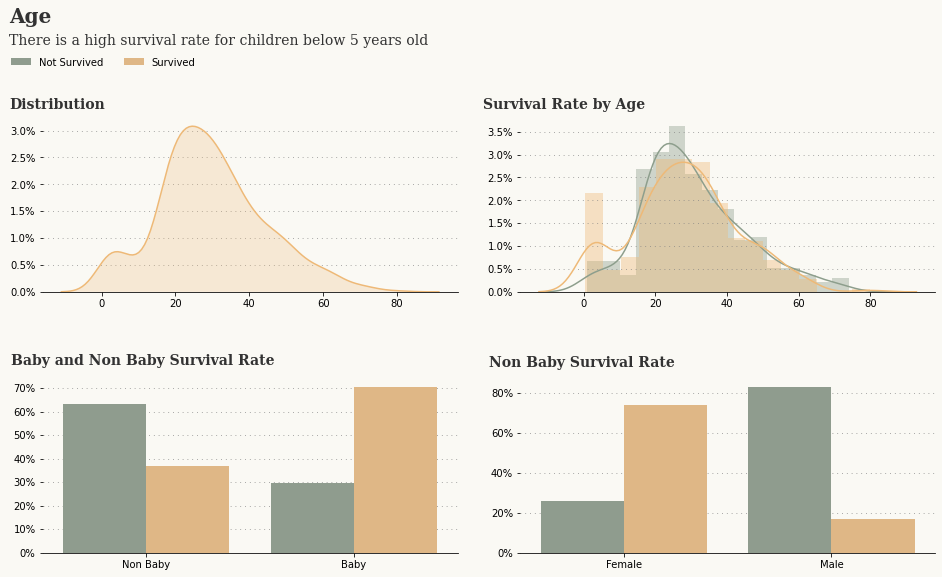

In [14]:
fig = plt.figure(figsize=(16, 8))
gs = fig.add_gridspec(2, 2)
gs.update(wspace=0.15, hspace=0.5)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])

background_color = "#faf9f4"
color_palette = ["#8d9e8c", "#eeb977"]
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) # axes background color
ax1.set_facecolor(background_color) # axes background color
ax2.set_facecolor(background_color) # axes background color
ax3.set_facecolor(background_color) # axes background color

# Distribution
ax0.text(-25, 0.05, 'Age', fontsize=20, fontweight='bold', fontfamily='serif', color="#323232")
ax0.text(-25, 0.046, 'There is a high survival rate for children below 5 years old', 
         fontsize=14, fontweight='light', fontfamily='serif', color="#323232")
ax0.text(-25, 0.034, 'Distribution', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(train_df["Age"], color="#eeb977", shade=True, ax=ax0, zorder=3)
ax0.set_xlabel("")
ax0.set_ylabel("")
ax0.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=1))
ax0.get_legend().remove()

# Survived by Age
ax1.text(-28, 0.04, 'Survival Rate by Age', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax1.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.distplot(train_df.loc[(train_df["Survived"]==0), "Age"], color="#8d9e8c", label="Not Survived", ax=ax1)
sns.distplot(train_df.loc[(train_df["Survived"]==1), "Age"], color="#eeb977", label="Survived", ax=ax1)
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=1))

# Baby survival rate
train_df["Baby"] = np.where(train_df["Age"] <= 5, 1, 0)
Baby_count = train_df["Baby"].value_counts().sort_index()
Baby_df = pd.DataFrame(train_df.groupby(["Baby", "Survived"])["Baby"].count())
Baby_df.columns = ["Count"]
Baby_df = Baby_df.reset_index(drop=False)
Baby_df["Total_by_Baby"] = Baby_df["Baby"].map(Baby_count)
Baby_df["Distribution_by_Baby"] = Baby_df["Count"] / Baby_df["Total_by_Baby"]
ax2.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax2.text(-0.65, 0.8, 'Baby and Non Baby Survival Rate', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
sns.barplot(ax=ax2, x="Baby", y="Distribution_by_Baby", data = Baby_df, hue="Survived", palette=color_palette, zorder=3)
legend_labels, _= ax2.get_legend_handles_labels()
ax2.legend(legend_labels, ["Not Survived", "Survived"],ncol=2, bbox_to_anchor=(0.39, 2.9), 
           facecolor=background_color, edgecolor=background_color)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=0))
ax2.set_xticklabels(["Non Baby","Baby"])
ax2.set_xlabel("")
ax2.set_ylabel("")

# Baby survival rate
NonBaby_df = train_df[train_df["Baby"]==0]
NonBaby_count = NonBaby_df["Sex"].value_counts().sort_index()
NonBaby_df = pd.DataFrame(NonBaby_df.groupby(["Sex", "Survived"])["Sex"].count())
NonBaby_df.columns = ["Count"]
NonBaby_df = NonBaby_df.reset_index(drop=False)
NonBaby_df["Total_by_Baby"] = NonBaby_df["Sex"].map(NonBaby_count)
NonBaby_df["Distribution_by_Baby"] = NonBaby_df["Count"] / NonBaby_df["Total_by_Baby"]
ax3.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax3.text(-0.65, 0.93, 'Non Baby Survival Rate', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
sns.barplot(ax=ax3, x="Sex", y="Distribution_by_Baby", data = NonBaby_df, hue="Survived", palette=color_palette, zorder=3)
ax3.get_legend().remove()
ax3.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=0))
ax3.set_xticklabels(["Female","Male"])
ax3.set_xlabel("")
ax3.set_ylabel("")

for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)

<a id="family"></a>
[back to top](#table-of-contents)
### 5.4 Family Member (SibSp - Sibblings Spouse + Parch - Parents Childrens)
Combine the no of sibblings/spouse and parents/childrens to calculate the no of family members in the Titanic. It gives more overall picture of the family member in the ship.

**Observations:**
* Almost 60% of the passengers travel alone
* Highest total family members in the ship is 10 without 8 and 9 family members
* Passengers with 1-3 family members have the highest chance to survived compared to others

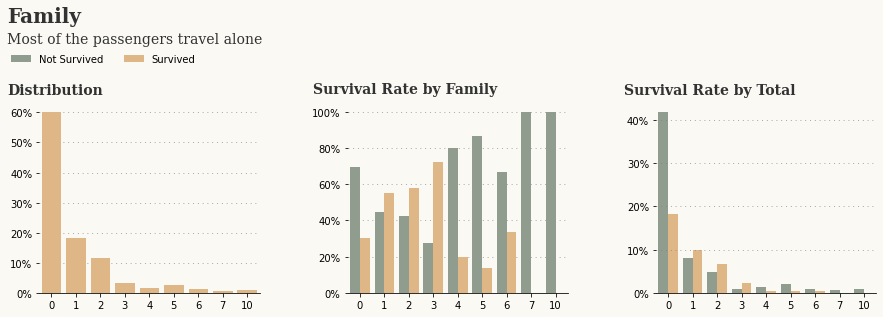

In [15]:
train_df["Family"] = train_df["SibSp"] + train_df["Parch"]

fig = plt.figure(figsize=(15,3.5))
gs = fig.add_gridspec(1, 3)
gs.update(wspace=0.4, hspace=0)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])

background_color = "#faf9f4"
color_palette = ["#8d9e8c", "#eeb977"]
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) # axes background color
ax1.set_facecolor(background_color) # axes background color
ax2.set_facecolor(background_color) # axes background color

# Distribution
ax0.text(-1.8, 0.90, 'Family', fontsize=20, fontweight='bold', fontfamily='serif', color="#323232")
ax0.text(-1.8, 0.83, 'Most of the passengers travel alone', 
         fontsize=14, fontweight='light', fontfamily='serif', color="#323232")
ax0.text(-1.8, 0.66, 'Distribution', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.barplot(ax=ax0, x="Family", y="Family", data=train_df, estimator=lambda x: len(x) / len(train_df["Family"]), color="#eeb977", zorder=3)
ax0.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=0))
ax0.set_xlabel("")
ax0.set_ylabel("")

# Survived by Family
Family_count = train_df["Family"].value_counts().sort_index()
Family_df = pd.DataFrame(train_df.groupby(["Family", "Survived"])["Family"].count())
Family_df.columns = ["Count"]
Family_df = Family_df.reset_index(drop=False)
Family_df["Total_by_Family"] = Family_df["Family"].map(Family_count)
Family_df["Distribution_by_Family"] = Family_df["Count"] / Family_df["Total_by_Family"]
ax1.text(-1.9, 1.1, 'Survival Rate by Family', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax1.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.barplot(ax=ax1, x="Family", y="Distribution_by_Family", data = Family_df, hue="Survived", palette=color_palette, zorder=3)
legend_labels, _= ax1.get_legend_handles_labels()
ax1.legend(legend_labels, ["Not Survived", "Survived"], ncol=2, bbox_to_anchor=(-0.65, 1.3), facecolor=background_color, edgecolor=background_color)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=0))
ax1.set_xlabel("")
ax1.set_ylabel("")

# Survived by Total
ax2.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax2.text(-1.8, 0.46, 'Survival Rate by Total', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
sns.barplot(ax=ax2, x="Family", y="Family", hue="Survived", data=train_df, estimator=lambda x: len(x) / len(train_df["Family"]), palette=color_palette)
ax2.get_legend().remove()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=0))
ax2.yaxis.set_major_locator(mtick.MultipleLocator(0.1))
ax2.set_xlabel("")
ax2.set_ylabel("")

for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)

<a id="fare2"></a>
[back to top](#table-of-contents)
### 5.5 Fare
**Observations:**
* Most of the fare is in the range 0-50.
* It's quite interesting that there are tickets that has zero value. Are this a crew members of the Titanic?
* We perform a logical test on the relation between the fare and the pclass (ticket class). We expect that the price for 1st class should be more expenssive compare to 2nd class and 2nd class should be more expensive than 3rd class. It's very interesting to see how fare doesn't really relate to ticket class and they don't show any big differences between ticket classes: 
(1) Fare for 2nd class and 3rd class passengers are not very differents, 
(2) 1st class passengers fare has the highest variance compared to others class and some are sold as cheap as the 2nd and 3rd class and 
(3) it seems higher fare has more chance to survived comapared to lower fare.
* We try to see a relation between fare, ticket class and survived features and we find that 
(1) some passengers on 1st and 2nd class that has no fare ticket are survived and 
(2) there is no distinct of survivability on each class based on the fare.


/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


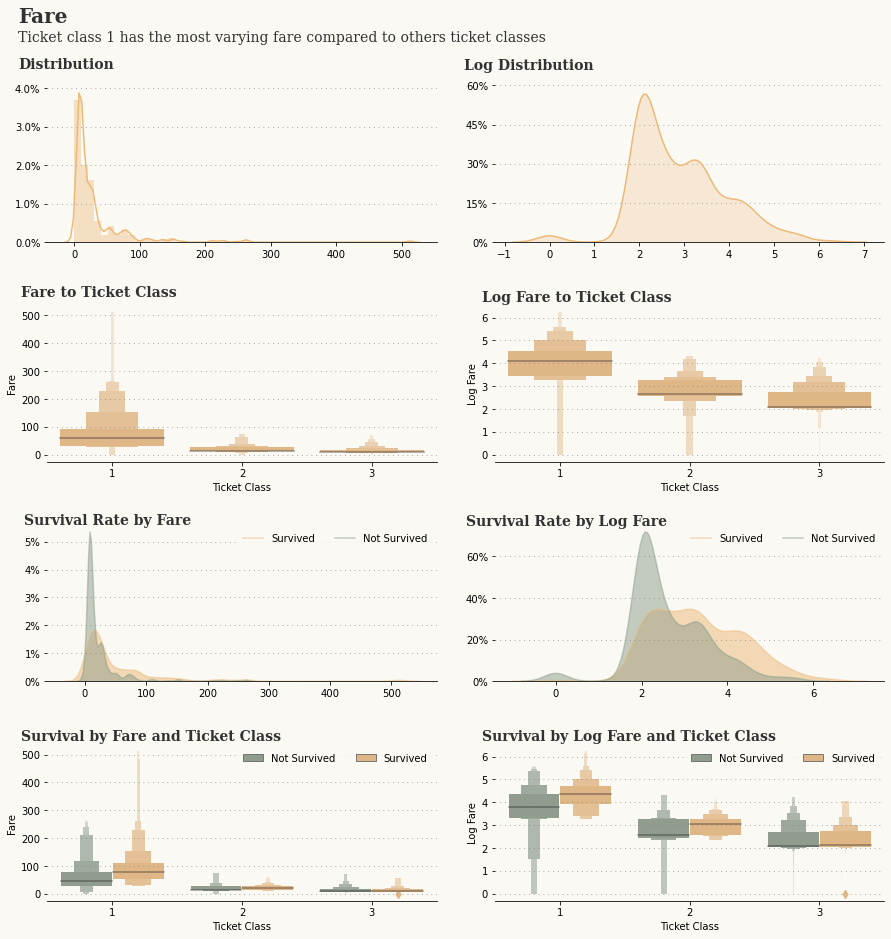

In [16]:
fig = plt.figure(figsize=(15,15))
gs = fig.add_gridspec(4, 2)
gs.update(wspace=0.15, hspace=0.4)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1], ylim=(0, 0.6))
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])
ax4 = fig.add_subplot(gs[2, 0])
ax5 = fig.add_subplot(gs[2, 1])
ax6 = fig.add_subplot(gs[3, 0])
ax7 = fig.add_subplot(gs[3, 1])

background_color = "#faf9f4"
color_palette = ["#8d9e8c", "#eeb977"]
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) # axes background color
ax1.set_facecolor(background_color) # axes background color
ax2.set_facecolor(background_color) # axes background color
ax3.set_facecolor(background_color) # axes background color
ax4.set_facecolor(background_color) # axes background color
ax5.set_facecolor(background_color) # axes background color
ax6.set_facecolor(background_color) # axes background color
ax7.set_facecolor(background_color) # axes background color

# Ax0
ax0.text(-85, 0.057, 'Fare', fontsize=20, fontweight='bold', fontfamily='serif', color="#323232")
ax0.text(-85, 0.052, 'Ticket class 1 has the most varying fare compared to others ticket classes', 
         fontsize=14, fontweight='light', fontfamily='serif', color="#323232")
ax0.text(-85, 0.045, 'Distribution', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.distplot(train_df["Fare"], color="#eeb977", ax=ax0)
ax0.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=1))
ax0.set_xlabel("")
ax0.set_ylabel("")

# Ax1
ax1.text(-1.9, 0.66, 'Log Distribution', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax1.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(np.where(train_df["Fare"]==0, 0, np.log(train_df["Fare"])), color="#eeb977", shade=True, ax=ax1)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=0))
ax1.yaxis.set_major_locator(mtick.MultipleLocator(0.15))
ax1.set_xlabel("")
ax1.set_ylabel("")

# Ax2
ax2.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(x="Pclass", y="Fare", data=train_df, color="#eeb977", ax=ax2, zorder=3)
ax2.text(-0.7, 570, 'Fare to Ticket Class', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax2.set_xlabel("Ticket Class")
ax2.set_ylabel("Fare")

# Ax3
train_df["Fare_log"] = np.where(train_df["Fare"] == 0, 0, np.log(train_df["Fare"]))
ax3.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(x="Pclass", y="Fare_log", data=train_df, color="#eeb977", ax=ax3, zorder=3)
ax3.text(-0.6, 6.7, 'Log Fare to Ticket Class', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax3.set_xlabel("Ticket Class")
ax3.set_ylabel("Log Fare")

# Ax4
Fare_survived_df = train_df[train_df["Survived"] == 1] 
Fare_not_survived_df = train_df[train_df["Survived"] == 0]
ax4.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax4.text(-100, 0.056, 'Survival Rate by Fare', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
sns.kdeplot(Fare_survived_df["Fare"], color="#eeb977", alpha=0.5, shade=True, label="Survived", ax=ax4)
sns.kdeplot(Fare_not_survived_df["Fare"], color="#8d9e8c", alpha=0.5, shade=True, label="Not Survived", ax=ax4)
ax4.legend(ncol=2, facecolor=background_color, edgecolor=background_color)
ax4.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=0))

# Ax5
ax5.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax5.text(-2.1, 0.75, 'Survival Rate by Log Fare', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
sns.kdeplot(Fare_survived_df["Fare_log"], color="#eeb977", alpha=0.5, shade=True, label="Survived", ax=ax5)
sns.kdeplot(Fare_not_survived_df["Fare_log"], color="#8d9e8c", alpha=0.5, shade=True, label="Not Survived", ax=ax5)
ax5.legend(ncol=2, facecolor=background_color, edgecolor=background_color)
ax5.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=0))

# Ax6
ax6.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(x="Pclass", y="Fare", hue="Survived", data=train_df, palette=color_palette, ax=ax6, zorder=3)
ax6.text(-0.7, 550, 'Survival by Fare and Ticket Class', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
legend_labels, _= ax6.get_legend_handles_labels()
ax6.legend(legend_labels, ["Not Survived", "Survived"], 
           ncol=2, facecolor=background_color, edgecolor=background_color)
ax6.set_xlabel("Ticket Class")
ax6.set_ylabel("Fare")

# Ax7
ax7.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(x="Pclass", y="Fare_log", hue="Survived", data=train_df, palette=color_palette, ax=ax7, zorder=3)
ax7.text(-0.6, 6.7, 'Survival by Log Fare and Ticket Class', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
legend_labels, _= ax7.get_legend_handles_labels()
ax7.legend(legend_labels, ["Not Survived", "Survived"], 
           ncol=2, facecolor=background_color, edgecolor=background_color)
ax7.set_xlabel("Ticket Class")
ax7.set_ylabel("Log Fare")

for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)
    ax6.spines[s].set_visible(False)
    ax7.spines[s].set_visible(False)

<a id="cabin2"></a>
[back to top](#table-of-contents)
### 5.6 Cabin
There are 148 unique cabin in the Titanic including passengers without cabin. We will extract the cabin first character and classify # of cabin to 9. Cabin **N** is a representative of no cabin. 

**Observations:** 
* A slight glance we can see is most of the passengers have no cabin and those are the passengers that are not survived the most.

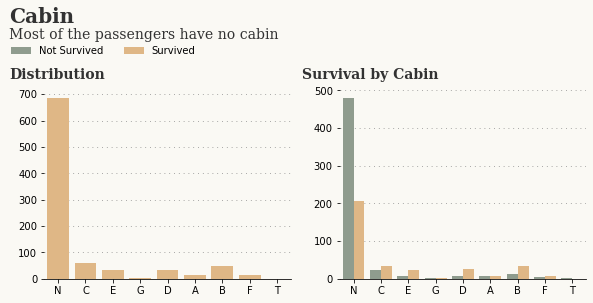

In [17]:
fig = plt.figure(figsize=(15,3.5))
gs = fig.add_gridspec(1, 3)
gs.update(wspace=0.2, hspace=0)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])

background_color = "#faf9f4"
color_palette = ["#8d9e8c", "#eeb977"]
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) # axes background color
ax1.set_facecolor(background_color) # axes background color

# Distribution
ax0.text(-1.8, 970, 'Cabin', fontsize=20, fontweight='bold', fontfamily='serif', color="#323232")
ax0.text(-1.8, 910, 'Most of the passengers have no cabin', 
         fontsize=14, fontweight='light', fontfamily='serif', color="#323232")
ax0.text(-1.8, 760, 'Distribution', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(x=train_df["Cabin_code"], color="#eeb977", ax=ax0, zorder=3)
ax0.set_xlabel("")
ax0.set_ylabel("")

# Survived by Cabin
ax1.text(-1.9, 530, 'Survival by Cabin', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax1.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(x="Cabin_code", hue="Survived", data=train_df, palette=color_palette, ax=ax1, zorder=3)
legend_labels, _= ax1.get_legend_handles_labels()
ax1.legend(legend_labels, ["Not Survived", "Survived"], ncol=2, bbox_to_anchor=(-0.55, 1.27), 
           facecolor=background_color, edgecolor=background_color)
ax1.set_xlabel("")
ax1.set_ylabel("")

for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)

<a id="embarked2"></a>
[back to top](#table-of-contents)
### 5.7 Embarked
**Observations:**
* Most of the passengers (70%) embarked from Southampton and all 15 ticket with 0 fare embarked from Southampton.
* Higher survivability on passengers that embarked from Cherbourg compared to others.
* It's interesting too see that different embarkment places have different distribution of passengers fare.

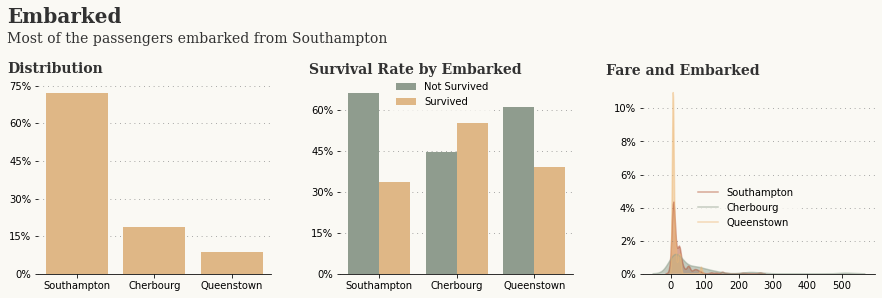

In [18]:
train_df["Embarked"] = train_df["Embarked"].fillna(-1)
test_df["Embarked"] = test_df["Embarked"].fillna(-1)
mapping = {"S": 0, "C":1, "Q":2}
train_df["Embarked"] = train_df["Embarked"].map(mapping)
test_df["Embarked"] = test_df["Embarked"].map(mapping)

fig = plt.figure(figsize=(15,3.5))
gs = fig.add_gridspec(1, 3)
gs.update(wspace=0.3, hspace=0)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])

background_color = "#faf9f4"
color_palette = ["#8d9e8c", "#eeb977"]
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) # axes background color
ax1.set_facecolor(background_color) # axes background color
ax2.set_facecolor(background_color) # axes background color

# Distribution
ax0.text(-0.9, 1, 'Embarked', fontsize=20, fontweight='bold', fontfamily='serif', color="#323232")
ax0.text(-0.9, 0.92, 'Most of the passengers embarked from Southampton', 
         fontsize=14, fontweight='light', fontfamily='serif', color="#323232")
ax0.text(-0.9, 0.8, 'Distribution', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.barplot(x="Embarked", y="Embarked", data=train_df, 
            estimator=lambda x: len(x) / len(train_df["Sex"]), color="#eeb977", zorder=3, ax=ax0)
ax0.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax0.yaxis.set_major_locator(mtick.MultipleLocator(0.15))
ax0.set_xlabel("")
ax0.set_ylabel("")
ax0.set_xticklabels(["Southampton", "Cherbourg", "Queenstown"])

# Survival Rate by Embarked
Embarked_count = train_df["Embarked"].value_counts().sort_index()
Embarked_df = pd.DataFrame(train_df.groupby(["Embarked", "Survived"])["Family"].count())
Embarked_df.columns = ["Count"]
Embarked_df = Embarked_df.reset_index(drop=False)
Embarked_df["Total_by_Embarked"] = Embarked_df["Embarked"].map(Embarked_count)
Embarked_df["Distribution_by_Embarked"] = Embarked_df["Count"] / Embarked_df["Total_by_Embarked"]
ax1.text(-0.9, 0.73, 'Survival Rate by Embarked', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax1.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.barplot(x="Embarked", y="Distribution_by_Embarked", data = Embarked_df, 
            hue="Survived", palette=color_palette, ax=ax1, zorder=3)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax1.yaxis.set_major_locator(mtick.MultipleLocator(0.15))
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_xticklabels(["Southampton", "Cherbourg", "Queenstown"])
legend_labels, _= ax1.get_legend_handles_labels()
ax1.legend(legend_labels, ["Not Survived", "Survived"], ncol=1, bbox_to_anchor=(0.2, 1.058), 
           facecolor=background_color, edgecolor=background_color)

# Fare & Embarked
ax2.text(-190, 0.12, 'Fare and Embarked', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax2.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(train_df[train_df["Embarked"]==0].Fare, shade=True, color="#b45537", alpha=0.5, label="Southampton", ax=ax2)
sns.kdeplot(train_df[train_df["Embarked"]==1].Fare, shade=True, color="#8d9e8c", alpha=0.5, label="Cherbourg", ax=ax2)
sns.kdeplot(train_df[train_df["Embarked"]==2].Fare, shade=True, color="#eeb977", alpha=0.5, label="Queenstown", ax=ax2)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=0))
ax2.set_xlabel("")
ax2.set_ylabel("")
ax2.legend(ncol=1, bbox_to_anchor=(0.2, 0.5), facecolor=background_color, edgecolor=background_color)

for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)

<a id="summary"></a>
[back to top](#table-of-contents)
## 6. Summary
Some interesting findings from the features are:
* 2nd class ticket is sold lower than 1st class ticket.
* 1st class passengers are the highest survivability compared to others class passengers, as may they have more privilaged to access life boat first than others and ease access to the life boat positions from their cabin.
* More female survived than male passengers, it seems they put priority to female for the life boat.
* It's quite interesting that there are tickets that has zero value. Are this a crew members of the Titanic?
* It's very interesting to see how fare doesn't really relate to ticket class and they don't show any big differences between ticket classes.
* Different embarkment places have different distribution of passengers fare.